<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [5]:
from keras.utils import to_categorical
train_target = to_categorical(train_target, 3)
test_target = to_categorical(test_target, 3)

In [15]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=train_features.shape[1]))
model.add(Dense(80, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [16]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                7650      
                                                                 
 dense_1 (Dense)             (None, 80)                7280      
                                                                 
 dense_2 (Dense)             (None, 70)                5670      
                                                                 
 dense_3 (Dense)             (None, 3)                 213       
                                                                 
Total params: 20,813
Trainable params: 20,813
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(train_features, train_target, epochs = 100, shuffle = True, batch_size=50, validation_split=0.01)

Epoch 1/100
357/357 [==============================] - 1s 1ms/step - loss: 0.9592 - accuracy: 0.5141 - val_loss: 1.0996 - val_accuracy: 0.5222
Epoch 2/100
357/357 [==============================] - 0s 1ms/step - loss: 0.9528 - accuracy: 0.5182 - val_loss: 1.1306 - val_accuracy: 0.5444
Epoch 3/100
357/357 [==============================] - 0s 1ms/step - loss: 0.9511 - accuracy: 0.5221 - val_loss: 0.9488 - val_accuracy: 0.6556
Epoch 4/100
357/357 [==============================] - 0s 1ms/step - loss: 0.9463 - accuracy: 0.5259 - val_loss: 0.8072 - val_accuracy: 0.7333
Epoch 5/100
357/357 [==============================] - 0s 1ms/step - loss: 0.9483 - accuracy: 0.5231 - val_loss: 1.1611 - val_accuracy: 0.5000
Epoch 6/100
357/357 [==============================] - 0s 1ms/step - loss: 0.9423 - accuracy: 0.5256 - val_loss: 1.0486 - val_accuracy: 0.5889
Epoch 7/100
357/357 [==============================] - 0s 1ms/step - loss: 0.9429 - accuracy: 0.5272 - val_loss: 1.1467 - val_accuracy: 0.5111

In [20]:
import matplotlib.pyplot as plt

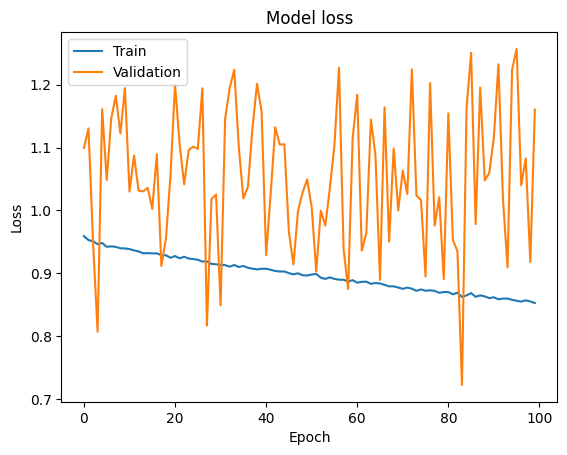

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
 
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
 
plt.show()

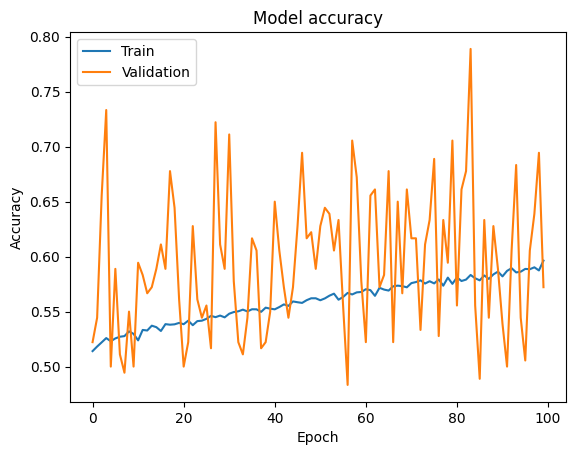

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
 
plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(test_features, test_target)

131/131 [==============================] - 0s 2ms/step - loss: 1.1707 - accuracy: 0.4376
